In [46]:
#Imnporting libraries
import pandas as pd
import numpy as np
from scipy.optimize import fmin_slsqp
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import math
import scipy
import scipy.stats as stats
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
import statsmodels.api as sm
from sklearn import linear_model
import Tkinter as tk
import statsmodels.api as sm
from pyvttbl import DataFrame
from scipy.stats import spearmanr
from statsmodels.tsa.seasonal import seasonal_decompose

#Listing the existing files in the dir
for root, dirs, files in os.walk("."):  
    for filename in files:
        print(filename)

code.ipynb
time_series.ipynb
COMMIT_EDITMSG
config
description
HEAD
index
applypatch-msg.sample
commit-msg.sample
fsmonitor-watchman.sample
post-update.sample
pre-applypatch.sample
pre-commit.sample
pre-push.sample
pre-rebase.sample
pre-receive.sample
prepare-commit-msg.sample
update.sample
exclude
HEAD
master
master
349a6c56502d4f9fdb04d78d8aeb27fbad0729
f1b70eed8c0f58883c67ae94393f5912538e83
87365763a6699abeb78e36b29599108e065542
25b05f0e7663043a1dbcf0fbed96ec01287b59
3b2a981d9ef04a707fc79e1f4d19814f50a52a
7665ed2976863334253b076b8b870355dfd30e
8238ea02b1095a2e9f6f7466d17e37a4009604
2bdc80716c38b985d1fff6ff89ee828fffe856
008e38e53173d537c97cd7f0f4c9095cc2c920
5a164683dab14a2c38acea119d67b93896b80a
f61801577291fe904e21dc0010267661f72f3d
42a29f266ab659e685cef3802de3af0e1b61c7
7e923d3d70cf19a2befa8dc8e07e5250be5edb
691f6c8009de7e94a6f15970341f7db3d50f5d
90eeb31c5e8b9757d1c386fba0290f5550a017
8a1b4139c3977dfd8d9b5554209bbd4b960b64
d781a6be05422435310e54dced2d78362b6282
fddc67411f29eef092

In [ ]:
#Creating a dataset
arr = [ 25, 48, 37, 41, 19, 32, 26, 16, 23, 23, 29, 36, 31, 26, 21, 32, 25, 31, 43, 35, 42, 38, 33, 28]
df = pd.DataFrame(arr)
df.columns = ['Values']

In [ ]:
#Estimating the number of classses following the formula that 2 ** k > n
N = int(round(math.log(len(df['Values']), 2)))

#Calculating class width
intervals = ((df['Values'].max() - df['Values'].min()) / N).round(decimals = 0)
limits = []
limits.append(df['Values'].min() + intervals)

def classes(N):
    '''The function defines the lower limits'''
    n = 0
    while n < N:
        for n in range(0, N):
            limits.append(limits[n] + intervals)
            n += n                  
    return limits[:-2]  
classes(N)

def cl_equal_intevals(X):
    '''The function assigns lables depending on which interval a data point falls into'''    
    for x in X:
        if x < limits[1]: return '1'
        elif (x >= limits[1]) * (x < limits[2]): return '2'
        elif (x >= limits[2]) * (x < limits[3]): return '3'
        elif (x >= limits[3]) * (x < limits[4]): return '4'        
        else: return '5'
        
df['cluster'] = df[['Values']].apply(cl_equal_intevals, axis = 1)

In [ ]:
freq_tbl = pd.DataFrame(df.loc[:, ['Values', 'cluster']].groupby(str('cluster')).count().iloc[:,0]).reset_index()
#Building a frequency plot
fig, ax = plt.subplots()
ax.bar(freq_tbl['cluster'], freq_tbl['Values'], alpha = 0.3)
_ = plt.title('Frequency plot')
_ = plt.xlabel('Classes')
_ = plt.ylabel('Density')
_ = ax.set_xticks([0, 1,2,3, 4, 5]) 
_ = ax.set_xticklabels(['(- 22)','[22-28)','[28-34)', '[34-40)', '[40-46)', '[46 -)'])

In [ ]:
#Estimating cumulative frequency
freq_tbl['Cumulative_frequency'] = freq_tbl['Values'].cumsum()
freq_tbl['Relative_cumulative_frequency'] = freq_tbl['Cumulative_frequency']/max(freq_tbl['Cumulative_frequency'])

In [ ]:
fig, ax1 = plt.subplots()
plt.plot(freq_tbl['cluster'], freq_tbl['Cumulative_frequency'], color='none')
ax1.set_ylabel("Number of x")

ax2 = ax1.twinx()
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
plt.plot(freq_tbl['cluster'], freq_tbl['Relative_cumulative_frequency'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Percent of x")
ax2.set_xticks([0, 1,2,3, 4, 5]) 
ax2.set_xticklabels(['(- 22)','[22-28)','[28-34)', '[34-40)', '[40-46)', '[46 -)'])

plt.title('Cumulative frequency plot')

plt.show()

In [ ]:
#Calculating the average
df['Values'].mean()

In [ ]:
#Calculating the weighted average
df_freq = df.groupby('Values').count()
df_freq = df_freq.reset_index()
def wavg(group, avg_name, weight_name):
    """ Calculating the weighted average in a df """
    d = group[avg_name]
    w = group[weight_name]
    return (d * w).sum() / w.sum()
wavg(df_freq, "Values", "cluster")

In [ ]:
#Calculating the geometric average
scipy.stats.gmean(df["Values"],axis = 0)
def geom_mean(avg_name):
    return ((avg_name.iloc[-1] / avg_name.iloc[0]) ** (1/len(avg_name))) - 1
geom_mean(df['Values'])

In [ ]:
#Creating a boxplot
plt.boxplot(df['Values'])
plt.title('Boxplot')

In [ ]:
#Calculating skeweness using PEARSON’S COEFFICIENT OF SKEWNESS 
arr = [557,	542,	419,	416,	396,	351,	313,	305,	285,	281,	269,	264,	252,	249,	248,	248,	240,	239,	235,	235,	233,	224,	219,	217,	211,	207,	205,	199,	198,	179,	178,	175,	174,	172,	169,	166,	165,	162,	157,	149,	145,	145,	136,	132,	128,	124,	120,	107,	107,	103,	100,	95,	94,	94,	92,	91,	80,	66,	59,	44]
df = pd.DataFrame(arr)
coef_of_skeweness = (3 * (df.mean() - df.median()))/ df.std()
#coef_of_skeweness > 0, thus, it indicates positive skeweness

In [ ]:
#Calculating confidence interval using z distribution
bottom = np.mean(arr) - 1.96*np.std(arr)/(np.sqrt(len(arr)))
upper = np.mean(arr) + 1.96*np.std(arr)/(np.sqrt(len(arr)))
print '30 days 95% confidence inverval:', (bottom,upper)

In [ ]:
arr = [7077,  5744,  6753,  7381,  7625,  6636,  7164,  7348,  8060,  5848,  9275,  7052]
#Calculating t statistic
t = (np.mean(arr)-6658)/(np.sqrt((((arr-np.mean(arr))**2)/(len(arr)-1)).sum())/np.sqrt(12)); t

In [ ]:
arr = [29.7 , 29.4  ,31.7  ,29.0  ,29.1  ,30.5 , 29.1 , 29.]
#Calculating t statistic
def t_stat(arr, pop_mean):
    """The function calculates t statistic"""
    return (np.mean(arr)-pop_mean)/(np.sqrt((((arr-np.mean(arr))**2)/(len(arr)-1)).sum())/np.sqrt(len(arr)))
t_stat(arr, 30)

In [ ]:
arr1 = [10, 12, 15, 19]
arr2 = [8, 9, 12, 15]
def t_statistic_two_sample(arr1, arr2):
    '''The function calculates t statistic for two-sample test of hypothesis for dependent samples'''
    substr = list(np.array(arr1) - np.array(arr2))
    avg = np.mean(substr)
    dif_from_mean = (substr - avg)**2
    st_dev = (sum(dif_from_mean)/ (len(arr1) - 1))**0.5
    t_statistic = avg / (st_dev / (len(arr1))**0.5)
    return t_statistic
t_statistic_two_sample(arr1, arr2)

In [ ]:
before = [ 6.6, 6.5, 9.0, 10.3, 11.2, 8.1, 6.3, 11.6]
after = [ 6.8 ,2.4, 7.4, 8.5, 8.1, 6.1, 3.4,  2]
t_statistic_two_sample(before, after)

In [ ]:
def z_statistic_two_sample(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates z statistic for two-sample test of hypothesis with population mean known for independent samples'''
    z = (x_bar_1 - x_bar_2) / ((std_1**2 / n_1) + (std_2**2 / n_2))**0.5
    return z
z_statistic_two_sample(57000, 61000, 9200, 7100, 40, 30)

In [ ]:
def t_statistic_two_sample_unequal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknown under the assumption that the populations are not equal'''
    df = ((std_1**2 / n_1) + (std_2**2 / n_2))**2 / (((std_1**2/n_1)**2)/(n_1 - 1) + ((std_2**2/n_2)**2)/(n_2 - 1))
    t = (x_bar_1 - x_bar_2) / ((std_1**2 / n_1) + (std_2**2 / n_2))**0.5
    return t, df
t_statistic_two_sample_unequal(83.55, 78.80, 10.50, 14.25, 10, 12)

In [ ]:
def t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknow under the assumption that population have equal deviations'''
    sp = ((n_1 - 1)*std_1**2 + (n_2 - 1)*std_2**2) / (n_1 + n_2 - 2)
    t = (x_bar_1 - x_bar_2) / (sp * ((1/float(n_1)) + (1/float(n_2))))**0.5
    return sp,t
t_statistic_two_sample_equal(83.55, 78.80, 10.50, 14.25, 10, 12)

In [ ]:
arr_1 = [138, 121,  88 ,115, 141, 125,96  ]
arr_2 = [128 ,134, 152 ,135, 114 ,106 ,112, 120]
def pre_processing(arr_1, arr_2):
    global x_bar_1, x_bar_2, std_1, std_2    
    x_bar_1 = np.mean(arr_1)
    x_bar_2 = np.mean(arr_2)
    std_1 = np.std(arr_1, ddof=1)
    std_2 = np.std(arr_2, ddof=1)
    return x_bar_1, x_bar_2, std_1, std_2
pre_processing(arr_1, arr_2)
t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, 7, 8)

In [ ]:
t_statistic_two_sample_equal(150000, 180000,40000,30000,15,25)

In [ ]:
#Anova
arr_1 = [98, 78, 54, 57, 68, 64, 70]
arr_2 = [75, 81, 81, 30, 82, 46, 58, 101]
stats.f_oneway(arr_1, arr_2)

In [ ]:
#Another way to do Anova
#One-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
lst = arr_1 + arr_2 + arr_3 + arr_4
def variation(data): 
    """The function calculates variations"""
    global avg
    avg = sum(data) / float(len(data))  
    vari = 0
    for d in data:
        vari += (d - avg)**2
    return vari
SSE = variation(arr_1) + variation(arr_2) + variation(arr_3) + variation(arr_4)
SS = variation(lst)
SST = SS - SSE
def f_statistic(SST, SSE, n_arr, lst):
    """The function calculation f statistic"""
    MST = SST / (n_arr - 1)
    MSE = SSE / (len(lst) - n_arr)
    return MST / MSE
f_statistic(SST, SSE, 4, lst)

In [ ]:
#Alternative way to calculate one-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3, arr_4)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def f_statistic(SST, SSE, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE / (float(data.size) - n_treat)
    return (MST/MSE)
f_statistic(SST(SS(df), SSE(df)), SSE(df), 4, df)

In [ ]:
#Two-way Anova
#Alternative way to calculate one-way Anova
arr_1 = [18, 16, 21, 23, 25]
arr_2 = [17, 23, 21, 22, 24]
arr_3 = [21, 23, 26, 29, 28]
arr_4 = [22, 22, 22, 25, 28]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3, arr_4)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    global global_avg
    global_avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - global_avg)**2).values.sum()
    return vari
def SSB(data, n_treat):
    SS(data)
    """The function calculates SSB"""
    local_avg =  np.mean(data, axis = 1)
    vari = (n_treat * (local_avg - global_avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def SSE_2(SS, SST, SSB): 
    """The function calculates SSE"""
    dif = SS - SST - SSB
    return dif
def f_statistic(SST, SSE_2, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE_2 / ((n_treat - 1)*(len(data.index) - 1))
    return (MST / MSE)
f_statistic(SST(SS(df), SSE(df)), SSE_2(SS(df), SST(SS(df), SSE(df)), SSB(df, 4)), 4, df)

In [ ]:
arr_1 = [31, 33, 28, 30, 28]
arr_2 = [25, 26, 24, 29, 26]
arr_3 = [35, 33, 30, 28, 27]
df = pd.DataFrame(np.vstack((arr_1, arr_2, arr_3)))
df = df.T
def SS(data): 
    """The function calculates SS"""
    global global_avg
    global_avg = (float(data.values.sum()) / float(data.size))
    vari = ((data - global_avg)**2).values.sum()
    return vari
def SSB(data, n_treat):
    SS(data)
    """The function calculates SSB"""
    local_avg =  np.mean(data, axis = 1)
    vari = (n_treat * (local_avg - global_avg)**2).values.sum()
    return vari
def SSE(data): 
    """The function calculates SSE"""
    vari = ((data - np.mean(data))**2).values.sum()
    return vari
def SST(SS, SSE):
    """The function calculates SST"""
    dif = SS - SSE
    return dif
def SSE_2(SS, SST, SSB): 
    """The function calculates SSE"""
    dif = SS - SST - SSB
    return dif
def f_statistic(SST, SSE_2, SSB, n_treat, data):
    """The function calculation f statistic"""
    MST = SST / (n_treat - 1)
    MSE = SSE_2 / ((n_treat - 1)*(len(data.index) - 1))
    treatment_f = (MST / MSE)
    MSB = SSB / (len(data.index)-1)
    blocks_f = MSB / MSE
    return blocks_f, treatment_f
f_statistic(SST(SS(df), SSE(df)), SSE_2(SS(df), SST(SS(df), SSE(df)), SSB(df, 3)), SSB(df, 3), 3, df)

In [ ]:
#Exercise
arr_1 = [31, 33, 28, 30, 28]
arr_2 = [25, 26, 24, 29, 26]
lst = arr_1 + arr_2
def variation(data): 
    """The function calculates variations"""
    global avg
    avg = sum(data) / float(len(data))  
    vari = 0
    for d in data:
        vari += (d - avg)**2
    return vari
SSE = variation(arr_1) + variation(arr_2)
SS = variation(lst)
SST = SS - SSE
def f_statistic(SST, SSE, n_arr, lst):
    """The function calculation f statistic"""
    MST = SST / (n_arr - 1)
    MSE = SSE / (len(lst) - n_arr)
    return MST / MSE
f_statistic(SST, SSE, 2, lst)
#stats.f_oneway(arr_1, arr_2, arr_3, arr_4)

In [ ]:
#Correlation and regression analysis
arr_1 = [4,2,5,6,3 ]
arr_2 = [15,8,21,24,17]
pearson_coef, p_value = stats.pearsonr(arr_1, arr_2) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [ ]:
#To check if there are 0 correlation in the population
def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.78, 20)

In [ ]:
#Coming up with regression equation
x = [89.2, 18.6, 18.2, 71.7, 58.6, 46.8, 17.5, 11.9, 19.6, 51.2, 28.6, 69.2]
y = [4.9, 4.4, 1.3, 8, 6.6, 4.1, 2.6, 1.7, 3.5, 8.2, 6, 12.8]
def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(x, y)

In [ ]:
arr_1 = [-8, -16, 12, 2, 18]
arr_2 = [58, 247, 15, 3, 341]
plt.scatter(arr_2,arr_1)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( arr_2,arr_1) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [ ]:
#Transforming x to get linear relationship
arr_1_2 = []
arr_1 = [-8, -16, 12, 2, 18]

for i in arr_1:
    l = i **2
    arr_1_2.append(l)
arr_2 = [58, 247, 15, 3, 341]
plt.scatter(arr_1_2,arr_1)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( arr_2,arr_1) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [ ]:
def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.47, 12)

In [ ]:
x = [6, 7.8, 7.3, 10.3, 10.1, 10.8, 11.5, 15.4, 13.5, 15.5, 17.4, 16.9, 11.6, 17.5]
y = [50.2, 50.4, 44, 49.9, 39.5, 43.1, 44, 40.1, 36, 31.7, 28.6, 26.9, 19.1, 17.6]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(-0.7468153584290134, 14)

In [ ]:
x = [12, 2, 6, 9, 7, 2, 8, 4, 10, 5]
y = [4, 10, 8, 5, 5, 8, 3, 8, 2, 5]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(-0.8269396448751986, 10)

In [ ]:
x = [2.833, 1.233, 2.144, 3.849, 8.124, 1.448, 1.51, 1.297, 1.257, 0.930]
y = [31.5, 30.5, 30.9, 31.6, 34.2, 34.2, 30.7, 31.7, 32.5, 32.6]

fig = plt.figure(figsize=(2.2,2.2), dpi=100)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw x and y')
_ = plt.ylabel('Y')
_= plt.xlabel('X')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 


def t_test_pearson(r, n):
    """The function calculates t statistic for pearson coefficient"""
    t = (r * ((n - 2)**0.5)) / (1 - r**2)**0.5
    return t
t_test_pearson(0.44972718100719067, 10)

In [ ]:
x = [9, 9, 3, 10, 5, 10, 7, 11, 6, 6, 4, 7, 7, 7, 6]
y = [5.1, 8, 9.7, 7.8, 7.7, 5.5, 8.3, 5.5, 10.3, 8, 8.8, 9.4, 8.6, 8.1, 7.8]
def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(x, y)

In [ ]:
#Indices
p_c_list = []
p_t = [69220, 54818, 55177, 65694, 83040, 88378, 97420, 98608]
for p in p_t:
    p_comp = (float(p)/ float(p_t[0]) ) * 100
    p_c_list.append(p_comp)
print p_c_list

In [ ]:
p_c_list = []
p_t = [486.6, 506.8, 522.2 ,574.6, 580.7, 568.5, 581.9, 496.1, 456.6, 433.3]
for p in p_t:
    p_comp = (float(p)/ float((p_t[0]+p_t[1]+p_t[2])/3 )) * 100
    p_c_list.append(p_comp)
print p_c_list

In [ ]:
p_0 = [2.49, 3.29, 1.59, 1.79]
q_0 = [6, 4, 2, 3]
p_t = [ 3.35, 4.49, 4.19, 2.49]
q_t = [ 6, 5, 3, 4]
p_c_list = []
for p in p_t:
    p_comp = (float(p)/ float((p_0[0] + p_0[1] + p_0[2] + p_0[3])/4) ) * 100
    p_c_list.append(p_comp)
print p_c_list
p_simple_agg = float((p_t[0] + p_t[1] + p_t[2] + p_t[3])) / float((p_0[0] + p_0[1] + p_0[2] + p_0[3]))
print p_simple_agg

In [ ]:
#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2010']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()

df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2017', 'qunatity_2017']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

In [ ]:
#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2017', 'qunatity_2017']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()

df_base.columns = ['price_2000', 'qunatity_2010']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

In [ ]:
#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(lasp_index, paasheche_index, fisher_index)

In [ ]:
#Value index
p_0 = [1.81, 3.56,2.32,2.72]
q_0 = [116,2, 8967, 227]
p_t = [ 2.09, 5.99, 3.65, 5.53]
q_t = [ 90, 2, 13601, 214]
df = pd.DataFrame(np.vstack((p_0, q_0,p_t, q_t)))
df = df.T
df.columns = ['price_02', 'qnty_02', 'price_15', 'qnty_15']
v = ((df.iloc[:,2].multiply(df.iloc[:,3]).sum())  / (df.iloc[:,0].multiply(df.iloc[:,1]).sum()))*100 

In [ ]:
p_domestic = [17316, 19825, 22455, 25274, 2770, 28377, 29775, 32444, 32309, 30889, 29437, 28907, 29830, 31910, 34782, 35687]
p_international = [11856, 12492, 13843, 16588, 19578, 22137, 23549, 28651, 31438, 31008, 32124, 36107, 37394, 39402, 39548, 34387]
p_employees = [100.9, 101.8, 108.3, 110.6, 109.9, 115.6, 122.2, 119.2, 118.7, 115.5, 114, 117.9, 127.6, 128.1, 126.5, 127.1]
p_dom = []
for p in p_domestic:
    p_comp = (float(p)/ float(p_domestic[0])) * 100
    p_dom.append(p_comp)
print p_dom
plt.plot(p_dom)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [ ]:
p_int = []
for p in p_international:
    p_comp_in = (float(p)/ float(p_international[0])) * 100
    p_int.append(p_comp_in)
print p_int
plt.plot(p_int)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [ ]:
p_empl = []
for p in p_employees:
    p_comp_emp = (float(p)/ float(p_employees[0])) * 100
    p_empl.append(p_comp_emp)
print p_empl
plt.plot(p_empl)
_= plt.title('Index of domestic sales (2000=100)')
_ = plt.xticks(np.arange(16), ('2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [ ]:
p_revenue = [134, 152, 157, 168, 177, 183, 150, 147, 147, 146, 149, 151]
p_employees= [325, 307, 316, 319, 327, 323, 304, 287, 301, 307, 305, 333]
p_revenue_list = []
for p in p_revenue:
    p_com_rev = (float(p)/ float(p_revenue[0])) * 100
    p_revenue_list.append(p_com_rev)
print p_revenue_list
plt.plot(p_revenue_list)
_= plt.title('Index of GE Revenue (2004=100)')
_ = plt.xticks(np.arange(12), ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [ ]:
p_empl_list = []
for p in p_employees:
    p_com_empl = (float(p)/ float(p_employees[0])) * 100
    p_empl_list.append(p_com_empl)
print p_empl_list
plt.plot(p_empl_list)
_= plt.title('Index of # of GE employees (2004=100)')
_ = plt.xticks(np.arange(12), ('2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'))
_ = plt.xticks(rotation=70)
_ = plt.ylabel('Index')
_ = plt.xlabel('Year')
plt.show()

In [ ]:
p_0 = [0.81, 0.84, 1.44, 2.91]
q_0 = [18, 5, 70, 27]
p_t = [2, 1.88, 2.89, 3.99]
q_t = [27, 9, 65, 33]
#Calculating simple index
p_simple = [float((ai)/bi)*100 for ai,bi in zip(p_t,p_0)]

#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(p_simple, lasp_index, paasheche_index, fisher_index)

In [ ]:
p_0 = [0.50, 1.20, 0.85]
q_0 = [320, 110, 230]
p_t = [0.60, 0.90, 1]
q_t = [340, 130, 250]
#Calculating simple index
p_simple = [float((ai)/bi)*100 for ai,bi in zip(p_t,p_0)]

#Calculating Laspeyres price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_base.iloc[:,1]).sum()
lasp_index = (pt_q0 / p0_q0) * 100

#Calculating Paashce price index
df_base = pd.DataFrame(np.vstack((p_0, q_0)))
df_base = df_base.T
df_t = pd.DataFrame(np.vstack((p_t, q_t)))
df_t = df_t.T
df_t.columns = ['price_2016', 'qunatity_2016']
pt_q0 = df_t.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
df_base.columns = ['price_2000', 'qunatity_2000']
p0_q0 = df_base.iloc[:,0].multiply(df_t.iloc[:,1]).sum()
paasheche_index = (pt_q0 / p0_q0)*100

#Calculating Fisher's Ideal index
fisher_index = ((lasp_index * paasheche_index)**0.5)
print(p_simple, lasp_index, paasheche_index, fisher_index)

In [ ]:
#Midterm
arr_1 =  [2.56,2.77,2.7,3,2.98,3.47,3.26,3.2,3.19,2.65,3,3.39,2.58]
arr_2 = [3.04,1.71,3.3,2.88,2.11,2.6,2.92,3.6,2.28,2.82,3.03,3.13,2.86,3.49,3.11,2.13,3.27]
def pre_processing(arr_1, arr_2):
    global x_bar_1, x_bar_2, std_1, std_2    
    x_bar_1 = np.mean(arr_1)
    x_bar_2 = np.mean(arr_2)
    std_1 = np.std(arr_1, ddof=1)
    std_2 = np.std(arr_2, ddof=1)
    return x_bar_1, x_bar_2, std_1, std_2
pre_processing(arr_1, arr_2)


In [ ]:
def t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknow under the assumption that population have equal deviations'''
    sp = ((n_1 - 1)*std_1**2 + (n_2 - 1)*std_2**2) / (n_1 + n_2 - 2)
    t = (x_bar_1 - x_bar_2) / (sp * ((1/float(n_1)) + (1/float(n_2))))**0.5
    return sp,t
t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, 13, 17)

In [ ]:
#Midterm
arr_1 =  [2,4,9,3,2]
arr_2 = [3,7,5,8,4,3]
def pre_processing(arr_1, arr_2):
    global x_bar_1, x_bar_2, std_1, std_2    
    x_bar_1 = np.mean(arr_1)
    x_bar_2 = np.mean(arr_2)
    std_1 = np.std(arr_1, ddof=1)
    std_2 = np.std(arr_2, ddof=1)
    return x_bar_1, x_bar_2, std_1, std_2
pre_processing(arr_1, arr_2)
def t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, n_1, n_2):
    '''The function calculates t statistic when population standard deviation is unknow under the assumption that population have equal deviations'''
    sp = ((n_1 - 1)*std_1**2 + (n_2 - 1)*std_2**2) / (n_1 + n_2 - 2)
    t = (x_bar_1 - x_bar_2) / (sp * ((1/float(n_1)) + (1/float(n_2))))**0.5
    return sp,t
t_statistic_two_sample_equal(x_bar_1, x_bar_2, std_1, std_2, 5, 6)

In [ ]:
x = [1,1.5,2.75,3,3.25,3.5,3.75,3.75,4,4,4.25,4.5,4.5,4.5,4.75,4.75,4.75,5,5,5,5.25,5.25,5.5,5.5,6,6.25]
y = [1,1.5,1.5,3,3.25,2.5,4,4.5,4,4.5,5.25,2.75,4.25,4.5,3.25,4.5,4.75,4.75,5,5.25,4.5,4.75,4,5.75,4.5,5]

fig = plt.figure(figsize=(2.2,2.2), dpi=400)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw the prices of a single hot dog and a medium soft drink at all the Major League Baseball stadia')
_ = plt.ylabel('Soft drink price')
_= plt.xlabel('Hot dog price ')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 

In [ ]:
x = [1,1.5,2.75,3,3.25,3.5,3.75,3.75,4,4,4.25,4.5,4.5,4.5,4.75,4.75,4.75,5,5,5,5.25,5.25,5.5,5.5,6,6.25]
y = [1,1.5,1.5,3,3.25,2.5,4,4.5,4,4.5,5.25,2.75,4.25,4.5,3.25,4.5,4.75,4.75,5,5.25,4.5,4.75,4,5.75,4.5,5]

fig = plt.figure(figsize=(2.2,2.2), dpi=400)
ax = plt.subplot(111)
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
line = slope*np.array(x)+intercept
plt.plot(x, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x,y, color="k", s=3.5)
_= plt.title('Exploring relationship btw the prices of a single hot dog and a medium soft drink at all the Major League Baseball stadia')
_ = plt.ylabel('Soft drink price')
_= plt.xlabel('Hot dog price ')
plt.show()
pearson_coef, p_value = stats.pearsonr( x,y) #define the columns to perform calculations on
print("Pearson Correlation Coefficient: ", pearson_coef, "and a P-value of:", p_value) # Results 
def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(x, y)

In [ ]:
arr2 = [81,74,62,92,76]
arr1 = [89,78,59,98,75.4]
def t_statistic_two_sample(arr1, arr2):
    '''The function calculates t statistic for two-sample test of hypothesis for dependent samples'''
    substr = list(np.array(arr1) - np.array(arr2))
    avg = np.mean(substr)
    dif_from_mean = (substr - avg)**2
    st_dev = (sum(dif_from_mean)/ (len(arr1) - 1))**0.5
    t_statistic = avg / (st_dev / (len(arr1))**0.5)
    return t_statistic
t_statistic_two_sample(arr1, arr2)

In [ ]:
#Plotting iris dataset
iris = datasets.load_iris()
x = iris.data[:, :1] 

def number_of_bins(x):
    '''The function calculates the number of bins'''
    n_bins = round(np.sqrt(len(x)))
    return int(n_bins)

number_of_bins(x)
sns.set()
_ = plt.hist(x, bins = number_of_bins(x))
_ = plt.xlabel('Width')
_ = plt.ylabel('Count')
_ = plt.title('Iris width')
plt.show()

In [ ]:
iris = datasets.load_iris()
x = iris.data[:, :2] 


_ = sns.swarmplot(x= iris.data[:, :1] , y= iris.data[:, 1:2] )

# Label the axes
_ = plt.ylabel('petal length (cm)')
_ = plt.xlabel('species')

# Show the plot
plt.show()

In [ ]:
#Doing a pareto analysis
df = pd.read_csv('./files/2015OnLineCustHist.csv')
df.head()

In [ ]:
def cum(data, group, sort):
    # The function calculates the cum percentage
    cum_sum = data.groupby(group).sum().sort_values(by=sort)
    cum_sum['percent'] = cum_sum[sort] / data[sort].sum()
    cum_sum['cum_per']= cum_sum['percent'].cumsum()
    return cum_sum
cum(df, df['CustomerId'], 'SalesValue')

In [ ]:
#Creating a control chart
df = pd.read_csv('./files/control_chart.csv')
df.head()

In [ ]:
df['mean'] = df.mean(axis = 1)
df['max'] = df.iloc[:, 1:3].max(axis = 1)
df['min'] = df.iloc[:, 1:3].min(axis = 1)
df['range'] = df['max'] - df['min']
gl_mean = df['mean'].mean()
df.insert(7, 'gl_mean', gl_mean)
ucl = df['mean'].mean() + 1.880 * 2.75; ucl
lcl = df['mean'].mean() - 1.880 * 2.75; lcl
df.insert(8, 'ucl', ucl)
df.insert(9, 'lcl', lcl)

In [ ]:
df['mean'].plot(marker="o")
df['gl_mean'].plot(color='black')
df['ucl'].plot(color='r')
df['lcl'].plot(color='r')
plt.title('Control Chart for Mean Weight')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(np.arange(20), ('1-Jan', '2-Jan', '3-Jan', '4-Jan', '5-Jan', '6-Jan', '7-Jan', '8-Jan', '9-Jan', '10-Jan', 
                           '11-Jan', '12-Jan', '13-Jan', '14-Jan', '15-Jan', '16-Jan',
                          '17-Jan', '18-Jan', '19-Jan', '20-Jan'))
plt.xticks(rotation=70)

In [ ]:
df_rang_mean =  df['range'].mean() 
df.insert(10, 'df_rang_mean', df_rang_mean)
ucl_ran = df['range'].mean() * 3.267 
lcl_ran = 0
df.insert(11, 'ucl_range', ucl_ran)
df.insert(12, 'lcl_ran', lcl_ran)
df['range'].plot(marker="o")
df['df_rang_mean'].plot(color='black')
df['ucl_range'].plot(color='r')
df['lcl_ran'].plot(color='r')
plt.title('Control Chart for Range Weight')
plt.ylabel('Value')
plt.xlabel('Date')
plt.xticks(np.arange(20), ('1-Jan', '2-Jan', '3-Jan', '4-Jan', '5-Jan', '6-Jan', '7-Jan', '8-Jan', '9-Jan', '10-Jan', 
                           '11-Jan', '12-Jan', '13-Jan', '14-Jan', '15-Jan', '16-Jan',
                          '17-Jan', '18-Jan', '19-Jan', '20-Jan'))
plt.xticks(rotation=70)

In [ ]:
#Calculating expected monetary value. P(S1) = .30, P(S2) = .50, and P(S3) = .20
raw = [{'alternative': 'A1', 'S1': 50, 'S2': 70, 'S3': 100},
{'alternative': 'A2', 'S1': 90, 'S2': 40, 'S3': 80},
{'alternative': 'A3', 'S1': 70, 'S2': 60, 'S3': 90}        
        ]
df = pd.DataFrame(raw)
prob = [{'S1': 0.3, 'S2': 0.5, 'S3': 0.2}]
df_prob = pd.DataFrame(prob)
for r in range(len(df)):
    df.iloc[:,0:3].multiply(df_prob)

for i in range(len(df)): 
    df2 = (df.iloc[i,:3] * df_prob).sum(axis = 1)
    print(df2)

In [ ]:
#Multiple lineare regression
df = pd.read_csv('./files/dataset_Facebook.csv')
df.head()

In [ ]:
#Encoding categorial values
#Selecting only those columns that are of the text format
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()
#Applying label encoding
df["Type"] = df["Type"].astype('category')
df.dtypes
df["type_category"] = df["Type"].cat.codes
df.head()

In [ ]:
#Applying 'Find and replace'
df["Type"].value_counts()
cleanup_nums = {"Type":     {"Photo": 1, "Status": 2, "Link": 3, "Video": 4}}
df.replace(cleanup_nums, inplace = True)
df.head()

In [ ]:
#Applying an one-code encoding
pd.get_dummies(df, columns=["Type"], prefix=["Type"]).head()

In [ ]:
#Checking for correlvation - visual inspection
plt.scatter(df['Type'], df['Total Interactions'], color='red')
plt.title('Type Vs Total Interactions', fontsize=14)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Total Interactions', fontsize=14)
plt.grid(True)
plt.show()
 
plt.scatter(df['Category'], df['Total Interactions'], color='green')
plt.title('Category Vs Total Interactions', fontsize=14)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Total Interactions', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Multiple linear regression
X = df[['Type','Category']] # here we have 2 variables for multiple regression
Y = df['Total Interactions']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

df['predictions'] = predictions

#Predicting
Type = 1
Category = 1
print ('Predicted Total Interactions: \n', regr.predict([[Type, Category]]))


In [ ]:
#An interesting application
# tkinter GUI
root= tk.Tk() 
 
canvas1 = tk.Canvas(root, width = 1200, height = 450)
canvas1.pack()

# with sklearn
Intercept_result = ('Intercept: ', regr.intercept_)
label_Intercept = tk.Label(root, text=Intercept_result, justify = 'center')
canvas1.create_window(260, 220, window=label_Intercept)

# with sklearn
Coefficients_result  = ('Coefficients: ', regr.coef_)
label_Coefficients = tk.Label(root, text=Coefficients_result, justify = 'center')
canvas1.create_window(260, 240, window=label_Coefficients)

# with statsmodels
print_model = model.summary()
label_model = tk.Label(root, text=print_model, justify = 'center', relief = 'solid', bg='LightSkyBlue1')
canvas1.create_window(800, 220, window=label_model)


# New_Interest_Rate label and input box
label1 = tk.Label(root, text='Type Type: ')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root) # create 1st entry box
canvas1.create_window(270, 100, window=entry1)

# New_Unemployment_Rate label and input box
label2 = tk.Label(root, text=' Type Category: ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root) # create 2nd entry box
canvas1.create_window(270, 120, window=entry2)


def values(): 
    global Type #our 1st input variable
    Type = float(entry1.get()) 
    
    global Category #our 2nd input variable
    Category = float(entry2.get()) 
    
    Prediction_result  = ('Predicted Total Interaction: ', regr.predict([[Type, Category]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='orange')
    canvas1.create_window(260, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='Predict Total Interactions',command=values, bg='orange') # button to call the 'values' command above 
canvas1.create_window(270, 150, window=button1)
 

root.mainloop()

In [ ]:
#Implementing Multiple Standard Error of Estimate
(((df['Total Interactions'] - df['predictions'])**2).sum() / (len(df)- (2 + 1))) * 0.5

In [ ]:
#Estimating a coef of determination
mean = df['Total Interactions'].mean()
df.insert(20, 'mean', mean)

In [ ]:
ss_total = ((df['Total Interactions'] - df['mean']) **2).sum(); ss_total
ssr = ((df['predictions'] - df['mean']) **2).sum(); ssr
r_sq = ssr / ss_total; r_sq

In [ ]:
#Using adjusted coef of determination
sse = ((df['Total Interactions'] - df['predictions']) **2).sum(); sse
r_sq_adj = 1 - ((sse / (500 - 3)) / (ss_total / (500 - 1))); r_sq_adj

In [ ]:
#Gobal test or testing the multiple regression model
#H0: β1 = β2 = 0
#H1: Not all the βi’s are 0. If the hypothesis test fails to reject the null hypothesis, it implies the regression coefficients are all zero and, logically, are of no value in estimating the dependent variable (heating cost)
F = (ssr / 2) / (sse / (500 - 3)); F
#F< critical value of , thus we fail to reject Ho

In [ ]:
#Saving as a csv
df.to_csv('./files/predictions.csv')

In [ ]:
#Creating a dataset
raw = [{'manufacturer': 'Sharp', 'Screen': 46, 'Price': 736.50 },
{'manufacturer': 'Samsung', 'Screen': 52, 'Price': 1150},
{'manufacturer': 'Samsung', 'Screen': 46, 'Price': 895}, 
{'manufacturer': 'Sony', 'Screen': 40, 'Price': 625},
{'manufacturer': 'Sharp', 'Screen': 52, 'Price': 773.25 },
{'manufacturer': 'Samsung', 'Screen': 46, 'Price': 961.25 },
{'manufacturer': 'Samsung', 'Screen': 40, 'Price': 686},
{'manufacturer': 'Sharp', 'Screen': 37, 'Price': 574.75 },
{'manufacturer': 'Sharp', 'Screen': 46, 'Price': 1000},
{'manufacturer': 'Sony', 'Screen': 40, 'Price': 722.25 },
{'manufacturer': 'Sony', 'Screen': 52, 'Price': 1307.50 },
{'manufacturer': 'Samsung', 'Screen': 52, 'Price': 373.75},
{'manufacturer': 'Sharp', 'Screen': 37, 'Price': 657.25 },
{'manufacturer': 'Sharp', 'Screen': 32, 'Price': 426.75 },
{'manufacturer': 'Sharp', 'Screen': 52, 'Price': 1389},
{'manufacturer': 'Samsung', 'Screen': 40, 'Price': 874.75 },
{'manufacturer': 'Sharp', 'Screen': 32, 'Price': 517.50 },
{'manufacturer': 'Samsung', 'Screen': 52, 'Price': 1475},
{'manufacturer': 'Sony', 'Screen': 40, 'Price': 954.25 },
{'manufacturer': 'Sony', 'Screen': 52, 'Price': 1551.50 },
{'manufacturer': 'Sony', 'Screen': 46, 'Price': 1303},
{'manufacturer': 'Sony', 'Screen': 46, 'Price': 1430.50 },
{'manufacturer': 'Sony', 'Screen': 52, 'Price': 1717.00}    
        ]
df = pd.DataFrame(raw)
df.head()

In [ ]:
#Applying a label encoding to convert screen to dummy var
df["Screen"] = df["Screen"].astype('category')
df.dtypes
df["screen_category"] = df["Screen"].cat.codes
df.head()

In [ ]:
plt.scatter(df['screen_category'], df['Price'], color='red')
plt.title('Screen size Vs Price', fontsize=14)
plt.xlabel('Screen', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Multiple linear regression
X = df[['Screen']] # here we have 2 variables for multiple regression
Y = df['Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

In [ ]:
#Adding dummy vars with 'Find and replace'
cleanup_nums = {"manufacturer":     {"Samsung": 1, "Sony": 2, "Sharp": 3}}
df.replace(cleanup_nums, inplace = True)
df.head()

In [ ]:
plt.scatter(df['manufacturer'], df['Price'], color='red')
plt.title('Manufacturer Vs Price', fontsize=14)
plt.xlabel('Manufacturer', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#Adding a manufacturer to the equation
X = df[['screen_category', 'manufacturer']] # here we have 2 variables for multiple regression
Y = df['Price']
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
df['predictions'] = predictions
 
print_model = model.summary()
print(print_model)

In [ ]:
df['residuals'] = df['Price'] - df['predictions']
plt.scatter(df['predictions'], df['residuals'], color='red')
plt.title('Residuals Vs Predictions', fontsize=14)
plt.xlabel('Predictions of Price', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
plt.hist(df['residuals'])
plt.title('Histogram of residuals')
plt.xlabel('Residuals', fontsize=14)
plt.ylabel('Freq', fontsize=14)
plt.show()

In [ ]:
df.to_csv('./files/predictions_exer.csv')

In [6]:
#Non-parametric tests
def test_of_hypothesis_one_proportion(p, nu, n):
    '''The function estimates test of hypothesis'''
    z = float( p - nu ) / float(((float(nu)*(1-float(nu)))/float(n))**0.5)
    return float(z)
test_of_hypothesis_one_proportion(0.0006, 0.0008, 10000)

-0.7073897937178663

In [13]:
def pooled_proportion(x1, x2, n1, n2):
    global pc
    pc = float((x1 + x2)) / float((n1 + n2))
    return pc
    """The function calculation pooled proportion"""
def test_of_hypothesis_two_proportion(p1, p2, n1, n2, pc):
    """The function estimates whether """
    z = float(p1 - p2) / ((pc * (1 - pc)/float(n1)) + (pc * (1 - pc)/float(n2))) ** 0.5
    return z
test_of_hypothesis_two_proportion(0.33, 0.18, 300, 200, pooled_proportion(100, 36, 300, 200))

3.6925955366146597

In [15]:
def chi_square(obs_freq, exp_freq):
    """The function calculates chi-square statistics for data of nomical scale"""
    chi_square = (((obs_freq - exp_freq) ** 2) / exp_freq).sum()
    return chi_square

In [ ]:
#Creating a dataset
raw = [{'favorite_meal': 'Chicken', 'observed_frequency': 32, 'expected_frequency': 30 },
{'favorite_meal': 'Fish', 'observed_frequency': 24, 'expected_frequency': 30},
{'favorite_meal': 'Meat', 'observed_frequency': 35, 'expected_frequency': 30}, 
{'favorite_meal': 'Pasta', 'observed_frequency': 29, 'expected_frequency': 30},   
        ]
df = pd.DataFrame(raw)
df

In [ ]:
chi_square(df['observed_frequency'], df['expected_frequency'])

In [16]:
#Creating a dataset
raw = [{'turn': 'straight', 'observed_frequency': 112, 'expected_frequency': 100 },
{'turn': 'left', 'observed_frequency': 48, 'expected_frequency': 50},
{'turn': 'right', 'observed_frequency': 40, 'expected_frequency': 50}
        ]
df = pd.DataFrame(raw)

chi_square(df['observed_frequency'], df['expected_frequency'])

3.52

In [23]:
#Creating a dataset
raw = [{'region': 'Northeast', 'observed_frequency': 68, 'expected_frequency': 84},
{'region': 'Midwest', 'observed_frequency': 104, 'expected_frequency': 96},
{'region': 'South', 'observed_frequency': 155, 'expected_frequency': 140},
{'region': 'South', 'observed_frequency': 73, 'expected_frequency': 80}       
        ]
df = pd.DataFrame(raw)

chi_square(df['observed_frequency'], df['expected_frequency'])

5.933928571428571

In [21]:
#Creating a dataset
raw = [{'radio': '1', 'observed_frequency': 53},
{'radio': '2', 'observed_frequency': 64},
{'radio': '3', 'observed_frequency': 33}
        ]
df = pd.DataFrame(raw)

def expected_frequency(data, observed):
    """The function adds the expected frequence"""
    exp = observed.sum() / len(data)
    data.insert(data.shape[1], 'expected_frequency', exp)
    return data
expected_frequency(df, df['observed_frequency'])

chi_square(df['observed_frequency'], df['expected_frequency'])

9.879999999999999

In [18]:
#Creating a dataset
raw = [{'category': 'A', 'observed_frequency': 10 },
{'category': 'B', 'observed_frequency': 20},
{'category': 'C', 'observed_frequency': 30}
        ]
df = pd.DataFrame(raw)

def expected_frequency(data, observed):
    """The function adds the expected frequence"""
    exp = observed.sum() / len(data)
    data.insert(data.shape[1], 'expected_frequency', exp)
    return data
expected_frequency(df, df['observed_frequency'])

chi_square(df['observed_frequency'], df['expected_frequency'])
df

,category,observed_frequency,expected_frequency
0,A,10,20
1,B,20,20
2,C,30,20


In [24]:
#Creating a dataset
raw = [{'outcome': '1', 'observed_frequency': 3 },
{'outcome': '2', 'observed_frequency': 6},
{'outcome': '3', 'observed_frequency': 2},
{'outcome': '4', 'observed_frequency': 3},
{'outcome': '5', 'observed_frequency': 9},
{'outcome': '6', 'observed_frequency': 7}
        ]
df = pd.DataFrame(raw)

def expected_frequency(data, observed):
    """The function adds the expected frequence"""
    exp = observed.sum() / len(data)
    data.insert(data.shape[1], 'expected_frequency', exp)
    return data
expected_frequency(df, df['observed_frequency'])

chi_square(df['observed_frequency'], df['expected_frequency'])

7.6

In [25]:
#Creating a dataset
raw = [{'category': 'A', 'observed_frequency': 30, 'expected_frequency': 24},
{'category': 'B', 'observed_frequency': 20, 'expected_frequency': 24},
{'category': 'C', 'observed_frequency': 10, 'expected_frequency': 12}
        ]
df = pd.DataFrame(raw)

chi_square(df['observed_frequency'], df['expected_frequency'])

2.5

In [196]:
#Creating a dataset
raw = [{'pay type': 'Salary', 'satisfied': 30, 'neutral': 17, 'dissatisfied': 8},
{'pay type': 'Hourly', 'satisfied': 140, 'neutral': 127, 'dissatisfied': 58}
        ]
df = pd.DataFrame(raw)
df_dropped = df.drop(['pay type'], axis = 1)
new_order = [2, 1, 0]
df_dropped = df_dropped[df_dropped.columns[new_order]]; df_dropped

,satisfied,neutral,dissatisfied
0,30,17,8
1,140,127,58


In [197]:
#Calculating total row and col sum
df_dropped['row_sum'] = df_dropped.sum(axis = 1)
df_dropped.loc['col_sum'] = df_dropped.sum()
df_dropped

,satisfied,neutral,dissatisfied,row_sum
0,30,17,8,55
1,140,127,58,325
col_sum,170,144,66,380


In [76]:
def degree_of_freedom(data):
    """The function calculates the degrees of freedrom for the further calculation of the critical value of chi-square"""
    df = (len(data) - 1)*(data.shape[1] - 1)
    return df
#exp_sat = (df.iloc[0, 1:].sum() * df.iloc[:, 1].sum()) / float(df.iloc[:, 1:].sum().sum())
#exp_neut = (df.iloc[1, 1:].sum() * df.iloc[:, 1].sum()) / float(df.iloc[:, 1:].sum().sum())

145.39473684210526

In [223]:
t = df_dropped.loc['col_sum', 'row_sum']
arr = np.outer(df_dropped['row_sum'], df_dropped.loc['col_sum']) / float(t)
df1 = pd.DataFrame(arr[:2,:3], columns = df_dropped.columns[:-1]).add_prefix('exp_')
df = pd.concat([df_dropped.iloc[:-1, :-1], df1], axis = 1); df
#Alternatively, expected_values = sm.stats.Table(df_dropped).fittedvalues; expected_values

,satisfied,neutral,dissatisfied,exp_satisfied,exp_neutral,exp_dissatisfied
0,30,17,8,24.605263,20.842105,9.552632
1,140,127,58,145.394737,123.157895,56.447368


In [234]:
#Putting the above together as a function
def expected_frequency(data):
    """The function calculates expected frequency"""
    data['row_sum'] = data.sum(axis = 1)
    data.loc['col_sum'] = data.sum()
    t = data.loc['col_sum', 'row_sum']
    arr = np.outer(data['row_sum'], data.loc['col_sum']) / float(t)
    data2 = pd.DataFrame(arr[:-1, :-1], columns = data.columns[:-1]).add_prefix('exp_')
    data = pd.concat([data.iloc[:-1, :-1], data2], axis = 1)
    return data
df = expected_frequency(df_dropped); df

,satisfied,neutral,dissatisfied,exp_satisfied,exp_neutral,exp_dissatisfied
0,30,17,8,24.605263,20.842105,9.552632
1,140,127,58,145.394737,123.157895,56.447368


In [258]:
chi = (((df.iloc[:, 0] - df.iloc[:, 3])**2 /  df.iloc[:, 3]) + ((df.iloc[:, 1] - df.iloc[:, 4])**2 /  df.iloc[:, 4]) + ((df.iloc[:, 2] - df.iloc[:, 5])**2 /  df.iloc[:, 5])).sum()
chi

2.506159912577024

In [31]:
#Creating a dataset
raw = [{'reduce the deficit': 244, 'increase the deficit': 194, 'no opinion': 68},
{'reduce the deficit': 305, 'increase the deficit': 114, 'no opinion': 25}
        ]

df = pd.DataFrame(raw)

def expected_frequency(data):
    """The function calculates expected frequency"""
    data['row_sum'] = data.sum(axis = 1)
    data.loc['col_sum'] = data.sum()
    t = data.loc['col_sum', 'row_sum']
    arr = np.outer(data['row_sum'], data.loc['col_sum']) / float(t)
    data2 = pd.DataFrame(arr[:-1, :-1], columns = data.columns[:-1]).add_prefix('exp_')
    data = pd.concat([data.iloc[:-1, :-1], data2], axis = 1)
    return data
df2 = expected_frequency(df); df2

chi = (((df2.iloc[:, 0] - df2.iloc[:, 3])**2 /  df2.iloc[:, 3]) + ((df2.iloc[:, 1] - df2.iloc[:, 4])**2 /  df2.iloc[:, 4]) + ((df2.iloc[:, 2] - df2.iloc[:, 5])**2 /  df2.iloc[:, 5])).sum()
chi

def degree_of_freedom(data):
    """The function calculates the degrees of freedrom for the further calculation of the critical value of chi-square"""
    df = (len(data) - 1)*(data.shape[1] - 1)
    return df
degree_of_freedom(df)

6

In [32]:
#Creating a dataset
raw = [{'name': 'sal', 'age': 28, 'browsing time': 342},
{'name': 'ray', 'age': 50, 'browsing time': 125},
{'name': 'roberta', 'age': 44, 'browsing time': 121},
{'name': 'jose', 'age': 32, 'browsing time': 257},
{'name': 'tom', 'age': 55, 'browsing time': 56},
{'name': 'george', 'age': 60, 'browsing time': 225},
{'name': 'joe', 'age': 38, 'browsing time': 185},
{'name': 'jack', 'age': 22, 'browsing time': 141},
{'name': 'marty', 'age': 21, 'browsing time': 342},
{'name': 'marty', 'age': 45, 'browsing time': 169},
{'name': 'joyce', 'age': 52, 'browsing time': 218},
{'name': 'bernie', 'age': 33, 'browsing time': 241},
{'name': 'judy', 'age': 19, 'browsing time': 583},
{'name': 'jody', 'age': 17, 'browsing time': 394},
{'name': 'ron', 'age': 21, 'browsing time': 249}       
        ]

df = pd.DataFrame(raw)

In [34]:
#Calculating spearman's correlation
coef, p = spearmanr(df['age'], df['browsing time'])
print('Spearmans correlation coefficient: %.3f' % coef)

# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

Spearmans correlation coefficient: -0.727
Samples are correlated (reject H0) p=0.002


In [38]:
#Creating a dataset
raw = [{'country': 'China', 'amount': 822.7},
{'country': 'Japan', 'amount': 110.7},
{'country': 'United States', 'amount': 88.2},
{'country': 'India', 'amount': 86.5},   
{'country': 'Russia', 'amount': 71.5}          
        ]

df = pd.DataFrame(raw)
df

,amount,country
0,822.7,China
1,110.7,Japan
2,88.2,United States
3,86.5,India
4,71.5,Russia


In [68]:
#Creating a subset i.e. extracting only China and the US as per the task
df_subset = df.loc[df['country'].isin(['China','United States'])]

#Calculating the index
(df_subset.iloc[0,0]/df_subset.iloc[1,0]) * 100

932.7664399092971

In [69]:
#Creating a dataset
raw = [{'year': '2008', 'loan': 69220},
{'year': '2009', 'loan': 54818},
{'year': '2010', 'loan': 55177},
{'year': '2011', 'loan': 65694},   
{'year': '2012', 'loan': 83040},    
{'year': '2013', 'loan': 88378},
{'year': '2014', 'loan': 97420},
{'year': '2015', 'loan': 98608}        
        ]

df = pd.DataFrame(raw)
df

,loan,year
0,69220,2008
1,54818,2009
2,55177,2010
3,65694,2011
4,83040,2012
5,88378,2013
6,97420,2014
7,98608,2015


In [74]:
p_c_list = []
for p in df.iloc[:,0]:
    p_comp = (float(p)/ float(df.iloc[0,0]) ) * 100
    p_c_list.append(p_comp)
print p_c_list

[100.0, 79.19387460271598, 79.71251083501878, 94.9060965039006, 119.96532793990175, 127.67697197341809, 140.73967061542908, 142.45593759029182]


In [75]:
#Creating a dataset
raw = [{'year': '2006', 'sales': 486.6},
{'year': '2007', 'sales': 506.8},
{'year': '2008', 'sales': 522.2},
{'year': '2009', 'sales': 574.6},   
{'year': '2010', 'sales': 580.7},     
{'year': '2011', 'sales': 568.5},
{'year': '2012', 'sales': 581.9},
{'year': '2013', 'sales': 496.1},   
{'year': '2014', 'sales': 456.6},    
{'year': '2015', 'sales': 433.3},         
        ]

df = pd.DataFrame(raw)
df

,sales,year
0,486.6,2006
1,506.8,2007
2,522.2,2008
3,574.6,2009
4,580.7,2010
5,568.5,2011
6,581.9,2012
7,496.1,2013
8,456.6,2014
9,433.3,2015


In [81]:
p_c_list = []
for p in df.iloc[:,0]:
    p_comp = (float(p)/ ((float(df.iloc[0,0] + float(df.iloc[1,0]) + float(df.iloc[2,0] )))/3)) * 100
    p_c_list.append(p_comp)
print p_c_list

[96.31828978622327, 100.31670625494853, 103.3650039588282, 113.73713380839273, 114.944576405384, 112.52969121140141, 115.18210609659538, 98.1987331749802, 90.38004750593825, 85.7680126682502]


In [82]:
#Creating a dataset
raw = [{'item': 'toothpaste', 'p_00': 2.49, 'q_00': 6, 'p_17': 3.35, 'q_17': 6},
{'item': 'shampoo', 'p_00': 3.29, 'q_00': 4, 'p_17': 4.49, 'q_17': 5},
{'item': 'cough', 'p_00': 1.59, 'q_00': 2, 'p_17': 4.19, 'q_17': 3},
{'item': 'anti', 'p_00': 1.79, 'q_00': 3, 'p_17': 2.49, 'q_17': 4}        
        ]

df = pd.DataFrame(raw)
df

,item,p_00,p_17,q_00,q_17
0,toothpaste,2.49,3.35,6,6
1,shampoo,3.29,4.49,4,5
2,cough,1.59,4.19,2,3
3,anti,1.79,2.49,3,4


In [85]:
#Determining the simple price indices
(df.iloc[:,2]/ df.iloc[:,1]) * 100

0    134.538153
1    136.474164
2    263.522013
3    139.106145
dtype: float64

In [95]:
def simple_price_index(p0, p1):
    """The function calculates simple price index"""
    ind = (p1 / p0 ) * 100
    return ind
simple_price_index(df.iloc[:,1], df.iloc[:,2])

0    134.538153
1    136.474164
2    263.522013
3    139.106145
dtype: float64

In [86]:
#Determining the simple aggregate price index for the two years
(df.iloc[:,2].sum()/df.iloc[:,1].sum())*100

158.51528384279476

In [97]:
def simple_aggregate_price_index(p0, p1):
    """The function calculates aggregate price index"""
    ind = (p1.sum() / p0.sum() ) * 100
    return ind
simple_aggregate_price_index(df.iloc[:,1], df.iloc[:,2])    

158.51528384279476

In [94]:
#Determining the index following Laspeyres Price Index
laspeyres = ((df.iloc[:,2]*df.iloc[:,3]).sum()/(df.iloc[:,1]*df.iloc[:,3]).sum())*100; laspeyres

147.09413369713508

In [99]:
def laspeyres(p0, p1, q0):
    """The function calculates Laspeyres Price Index"""
    ind = ((p1*q0).sum()/(p0*q0).sum())*100
    return ind
laspeyres(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])

147.09413369713508

In [93]:
#Determining the index following Paashe price Index
paashe = ((df.iloc[:,2]*df.iloc[:,4]).sum()/(df.iloc[:,1]*df.iloc[:,4]).sum())*100; paashe

150.2308402585411

In [100]:
def paashe(p0, p1, q1):
    """The function calculates Paashe Price Index"""
    ind = ((p1*q1).sum()/(p0*q1).sum())*100
    return ind
paashe(df.iloc[:,1], df.iloc[:,2], df.iloc[:,4])

150.2308402585411

In [92]:
#Determing the index following Fisher Ideal index
fisher = (laspeyres * paashe) ** 0.5; fisher

148.6542138737506

In [101]:
def fisher(laspeyres, paashe):
    """The function calculates Fisher Ideal Index"""
    ind = (laspeyres * paashe) ** 0.5
    return ind
fisher(laspeyres(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]), paashe(df.iloc[:,1], df.iloc[:,2], df.iloc[:,4]))

148.6542138737506

In [102]:
#Creating a dataset
raw = [{'item': 'oats', 'p_00': 1.81, 'q_00': 116, 'p_17': 2.09, 'q_17': 90},
{'item': 'wheat', 'p_00': 3.56, 'q_00': 2, 'p_17': 5.99, 'q_17': 2},
{'item': 'cern', 'p_00': 2.32, 'q_00': 8967, 'p_17': 3.65, 'q_17': 13601},
{'item': 'barkeley', 'p_00': 2.72, 'q_00': 227, 'p_17': 5.53, 'q_17': 214}        
        ]

df = pd.DataFrame(raw)
df

,item,p_00,p_17,q_00,q_17
0,oats,1.81,2.09,116,90
1,wheat,3.56,5.99,2,2
2,cern,2.32,3.65,8967,13601
3,barkeley,2.72,5.53,227,214


In [104]:
def value_index(p0, p1, q0, q1):
    """The function calculates Value index"""
    ind = ((p1*q1).sum()/(p0*q0).sum())*100
    return ind
value_index(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3], df.iloc[:,4])

235.82236957642957

In [110]:
#Creating a dataset
raw = [{'indicator': 'unemployemnt', 'v0': 5.3, 'v1': 6.8, 'w': 0.2},
{'indicator': 'county storck', 'v0': 265.88, 'v1': 362.26, 'w': 0.4},
{'indicator': 'country_price_index','v0': 109.6, 'v1': 125.0, 'w': 0.25},  
{'indicator': 'retail_sales','v0': 529917.0 , 'v1':  622864.0, 'w': 0.15}
        ]

df = pd.DataFrame(raw)
df

,indicator,v0,v1,w
0,unemployemnt,5.30,6.80,0.20
1,county storck,265.88,362.26,0.40
2,country_price_index,109.60,125.00,0.25
3,retail_sales,529917.00,622864.00,0.15


In [111]:
def special_purpose_index(v0, v1, w):
    """The function calculates special purpose index"""
    ind = (((v1 / v0 ) * w).sum()) * 100
    return ind
special_purpose_index(df.iloc[:,1], df.iloc[:,2], df.iloc[:, 3])

126.30391290967242

In [112]:
#Creating a dataset
raw = [{'year': '2004', 'revenue': 134, 'employees': 325},
{'year': '2005', 'revenue': 152, 'employees': 307},
{'year': '2006','revenue': 157, 'employees': 316},  
{'year': '2007','revenue': 168, 'employees':  319},
{'year': '2008','revenue': 177, 'employees': 327},  
{'year': '2009','revenue': 183, 'employees':  323},       
{'year': '2010','revenue': 150, 'employees': 304},  
{'year': '2011','revenue': 147, 'employees':  287},
{'year': '2012','revenue': 147, 'employees': 301},  
{'year': '2013','revenue': 146, 'employees':  307}, 
{'year': '2014','revenue': 149, 'employees': 305},  
{'year': '2015','revenue': 151, 'employees':  333}     
      ]

df = pd.DataFrame(raw)
df

,employees,revenue,year
0,325,134,2004
1,307,152,2005
2,316,157,2006
3,319,168,2007
4,327,177,2008
5,323,183,2009
6,304,150,2010
7,287,147,2011
8,301,147,2012
9,307,146,2013


In [113]:
#Calculating simple index for employees
p_c_list = []
for p in df.iloc[:,0]:
    p_comp = (float(p)/ (float(df.iloc[0,0]))) * 100
    p_c_list.append(p_comp)
print p_c_list

[100.0, 94.46153846153847, 97.23076923076923, 98.15384615384616, 100.61538461538461, 99.38461538461539, 93.53846153846153, 88.3076923076923, 92.61538461538461, 94.46153846153847, 93.84615384615384, 102.46153846153847]


In [114]:
#Calculating simple index for revenue
p_c_list = []
for p in df.iloc[:,1]:
    p_comp = (float(p)/ (float(df.iloc[0,1]))) * 100
    p_c_list.append(p_comp)
print p_c_list

[100.0, 113.43283582089552, 117.16417910447761, 125.37313432835822, 132.08955223880596, 136.56716417910448, 111.94029850746267, 109.70149253731343, 109.70149253731343, 108.95522388059702, 111.19402985074626, 112.68656716417911]


In [115]:
#Creating a dataset
raw = [{'item': 'margarine', 'p_00': 0.81, 'q_00': 18, 'p_17': 2, 'q_17': 27},
{'item': 'shortening', 'p_00': 0.84, 'q_00': 5, 'p_17': 1.88, 'q_17': 9},
{'item': 'milk', 'p_00': 1.44, 'q_00': 70, 'p_17': 2.89, 'q_17': 65},
{'item': 'potato', 'p_00': 2.91, 'q_00': 27, 'p_17': 3.99, 'q_17': 33}        
        ]

df = pd.DataFrame(raw)
df

,item,p_00,p_17,q_00,q_17
0,margarine,0.81,2.00,18,27
1,shortening,0.84,1.88,5,9
2,milk,1.44,2.89,70,65
3,potato,2.91,3.99,27,33


In [116]:
simple_price_index(df.iloc[:,1], df.iloc[:,2])

0    246.913580
1    223.809524
2    200.694444
3    137.113402
dtype: float64

In [117]:
laspeyres(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3])

179.3742114559677

In [118]:
fisher(laspeyres(df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]), paashe(df.iloc[:,1], df.iloc[:,2], df.iloc[:,4]))

178.80333414690222

In [154]:
#Creating a dataset
raw = [{'year': 1998, 'production': 5},
{'year': 1999, 'production': 6},     
{'year': 2000, 'production': 8},
{'year': 2001, 'production': 10},
{'year': 2002, 'production': 5},
{'year': 2003, 'production': 3},     
{'year': 2004, 'production': 7},
{'year': 2005, 'production': 10},
{'year': 2006, 'production': 12},
{'year': 2007, 'production': 11},     
{'year': 2008, 'production': 9},
{'year': 2009, 'production': 13},
{'year': 2010, 'production': 15},
{'year': 2011, 'production': 18},     
{'year': 2012, 'production': 15},
{'year': 2013, 'production': 11},
{'year': 2014, 'production': 14},
{'year': 2015, 'production': 17},     
{'year': 2016, 'production': 22}      
       
        ]

df = pd.DataFrame(raw)
df = df.set_index('year'); df.head()

,production
year,
1998,5
1999,6
2000,8
2001,10
2002,5


In [158]:
df['moving_average'] = df['production'].rolling(window = 3).mean(); df

,production,moving_average
year,,
1998,5,NaN
1999,6,NaN
2000,8,6.333333
2001,10,8.000000
2002,5,7.666667
2003,3,6.000000
2004,7,5.000000
2005,10,6.666667
2006,12,9.666667


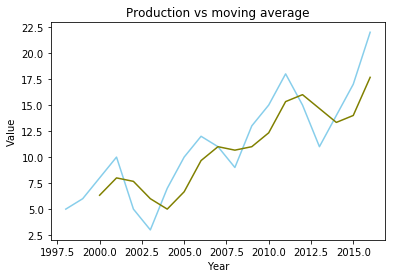

In [159]:
plt.plot('production', data = df, color='skyblue')
plt.plot('moving_average', data = df, color='olive')
plt.title('Production vs moving average')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

In [162]:
#Creating a dataset
raw = [     
{'year': 2008, 'production': 8},
{'year': 2009, 'production': 11},
{'year': 2010, 'production': 9},
{'year': 2011, 'production': 14},     
{'year': 2012, 'production': 9},
{'year': 2013, 'production': 10},
{'year': 2014, 'production': 10},
{'year': 2015, 'production': 8},     
{'year': 2016, 'production': 12}      
               ]

df = pd.DataFrame(raw)
df = df.set_index('year'); df.head()

df['moving_average'] = df['production'].rolling(window = 4).mean(); df

,production,moving_average
year,,
2008,8,NaN
2009,11,NaN
2010,9,NaN
2011,14,10.50
2012,9,10.75
2013,10,10.50
2014,10,10.75
2015,8,9.25
2016,12,10.00


In [12]:
#Creating a dataset
raw = [     
{'year': 2006, 'production': 6714},
{'year': 2007, 'production': 7991},    
{'year': 2008, 'production': 9075},
{'year': 2009, 'production': 9775},
{'year': 2010, 'production': 9762},
{'year': 2011, 'production': 10180},     
{'year': 2012, 'production': 8334},
{'year': 2013, 'production': 8272},
{'year': 2014, 'production': 6162},
{'year': 2015, 'production': 6897},     
{'year': 2016, 'production': 8285}      
               ]

df = pd.DataFrame(raw)
df = df.set_index('year'); df.head()

,production
year,
2006,6714
2007,7991
2008,9075
2009,9775
2010,9762


In [17]:
initial_value = 1
df['Counter'] = range(initial_value, len(df) +initial_value)

def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    global a, b
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(df['Counter'], df['production'])

(8842.127272727272, -88.12727272727273, -0.22032679134681155)

In [19]:
#Predicting the value
y = a + b * 12; y

7784.5999999999985

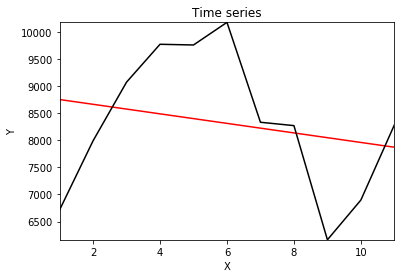

In [14]:
plt.xlim(np.min(df['Counter'] ), np.max(df['Counter'] ))
plt.ylim(np.min(df['production'] ), np.max(df['production'] ))
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Counter'] ,df['production'] )
line = slope*np.array(df['Counter'] )+intercept
plt.plot(df['Counter'] , line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.plot(df['Counter'] ,df['production'] , color="k")
plt.title('Time series')
plt.ylabel('Y')
plt.xlabel('X')
plt.show()

In [20]:
#Creating a dataset
raw = [     
{'year': 2013, 'production': 2},
{'year': 2014, 'production': 4},
{'year': 2015, 'production': 3},     
{'year': 2016, 'production': 5},
{'year': 2017, 'production': 6}    
               ]

df = pd.DataFrame(raw)
df = df.set_index('year'); df.head()

,production
year,
2013,2
2014,4
2015,3
2016,5
2017,6


In [21]:
initial_value = 1
df['Counter'] = range(initial_value, len(df) +initial_value)

def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    global a, b
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(df['Counter'], df['production'])

(1.2999999999999998, 0.9, 0.9)

In [22]:
#Predicting the value
y = a + b * 7; y

7.6

In [23]:
#Creating a dataset
raw = [     
{'year': 2003, 'production': 124.2},
{'year': 2004, 'production': 175.6},
{'year': 2005, 'production': 306.9},     
{'year': 2006, 'production': 524.2},
{'year': 2007, 'production': 714},     
{'year': 2008, 'production': 1052},
{'year': 2009, 'production': 1638.3},
{'year': 2010, 'production': 2463.2},     
{'year': 2011, 'production': 3358.2},
{'year': 2012, 'production': 4181.3},    
{'year': 2013, 'production': 5388.5},
{'year': 2014, 'production': 8027.4},     
{'year': 2015, 'production': 10587.2},
{'year': 2016, 'production': 13537.4},   
{'year': 2017, 'production': 17515.6}    
               ]

df = pd.DataFrame(raw)
df = df.set_index('year'); df.head()

,production
year,
2003,124.2
2004,175.6
2005,306.9
2006,524.2
2007,714.0


In [29]:
#As it follows a curvilinear trend, we need to calculate a log base 10. Thus, the results will be in terms of percent of change
df2 = pd.DataFrame(np.log10(df['production']))

In [30]:
initial_value = 1
df2['Counter'] = range(initial_value, len(df) +initial_value)

def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    global a, b
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(df2['Counter'], df2['production'])

(2.0538051482729207, 0.15335726601437905, 0.9939533086269103)

In [33]:
#To find the estimated imports for the year 2019, we need the antilog.
y = a + b * 19; 10**y

92809.66446014152

In [34]:
#Creating a dataset
raw = [      
{'year': 2013, 'production': 1.1},
{'year': 2014, 'production': 1.5},     
{'year': 2015, 'production': 2},
{'year': 2016, 'production': 2.4},   
{'year': 2017, 'production': 3.1}    
               ]

df = pd.DataFrame(raw)
df = df.set_index('year')

df2 = pd.DataFrame(np.log10(df['production']))

initial_value = 1
df2['Counter'] = range(initial_value, len(df) +initial_value)

def regression_equation(arr_1, arr_2):
    """The function prepares the regression equation"""
    global a, b
    x_bar = np.mean(arr_1)
    y_bar = np.mean(arr_2)
    std_x = np.std(arr_1)
    std_y = np.std(arr_2)    
    pearson_coef, p_value = stats.pearsonr(arr_1, arr_2)
    b = pearson_coef * (float(std_y) / float(std_x))
    a = y_bar - b * x_bar
    return a, b, pearson_coef
regression_equation(df2['Counter'], df2['production'])

(-0.05320002491765269, 0.110405800000802, 0.9960255416493575)

In [36]:
y = a + b * 8; 10**y

6.761551731365083

In [42]:
#Creating a dataset
raw = [      
{'year': 2012, 'quarter': 'winter', 'production': 6.7},
{'year': 2012, 'quarter': 'spring', 'production': 4.6},
{'year': 2012, 'quarter': 'summer', 'production': 10}, 
{'year': 2013, 'quarter': 'fall', 'production': 12.7},   
{'year': 2013, 'quarter': 'winter', 'production': 6.5},     
{'year': 2013, 'quarter': 'spring', 'production': 4.6},
{'year': 2013, 'quarter': 'summer', 'production': 9.8}, 
{'year': 2013, 'quarter': 'fall', 'production': 13.6},       
{'year': 2014, 'quarter': 'winter', 'production': 6.9},
{'year': 2014, 'quarter': 'spring', 'production': 5},
{'year': 2014, 'quarter': 'summer', 'production': 10.4}, 
{'year': 2014, 'quarter': 'fall', 'production': 14.1}, 
{'year': 2015, 'quarter': 'winter', 'production': 7},
{'year': 2015, 'quarter': 'spring', 'production': 5.5},
{'year': 2015, 'quarter': 'summer', 'production': 10.8}, 
{'year': 2015, 'quarter': 'fall', 'production': 15},     
{'year': 2016, 'quarter': 'winter', 'production': 7.1},  
{'year': 2016, 'quarter': 'spring', 'production': 5.7},
{'year': 2016, 'quarter': 'summer', 'production': 11.1}, 
{'year': 2016, 'quarter': 'fall', 'production': 14.5},    
{'year': 2017, 'quarter': 'winter', 'production': 8},     
{'year': 2017, 'quarter': 'spring', 'production': 6.2},
{'year': 2017, 'quarter': 'summer', 'production': 11.4}, 
{'year': 2017, 'quarter': 'fall', 'production': 14.9},       
               ]

df = pd.DataFrame(raw)
df = df.set_index('year')

initial_value = 1
df['Counter'] = range(initial_value, len(df) +initial_value)

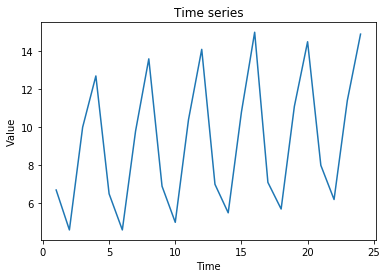

In [45]:
plt.plot('Counter', 'production', data = df)
plt.title('Time series')
plt.ylabel('Value')
plt.xlabel('Time')
plt.show()

In [55]:
series = pd.Series(df['production'])
result = seasonal_decompose(series, model = 'additive')
result.plot()
plt.show()

AttributeError: 'Int64Index' object has no attribute 'inferred_freq'

In [276]:
#Paretto chart
#Creating a dataset
raw = [      
{'reason': 'laundering', 'gallons': 24.9},
{'reason': 'watering', 'gallons': 143.7},
{'reason': 'bathing', 'gallons': 106.7}, 
{'reason': 'cooking', 'gallons': 5.1},
{'reason': 'swimming pool', 'gallons': 28.3},
{'reason': 'dishwashing', 'gallons': 12.3},
{'reason': 'car washing', 'gallons': 10.4},
{'reason': 'drinking', 'gallons': 7.9}     
               ]

df = pd.DataFrame(raw).sort_values(by = 'gallons', ascending = False)
t = df.gallons.sum()

In [277]:
#Calculating % & cum percentage
df['percentage'] = df.gallons.divide(t)
df['cum_perc'] = df.percentage.cumsum(); df

,gallons,reason,percentage,cum_perc
1,143.7,watering,0.423519,0.423519
2,106.7,bathing,0.314471,0.737990
4,28.3,swimming pool,0.083407,0.821397
0,24.9,laundering,0.073386,0.894783
5,12.3,dishwashing,0.036251,0.931034
6,10.4,car washing,0.030651,0.961686
7,7.9,drinking,0.023283,0.984969
3,5.1,cooking,0.015031,1.000000


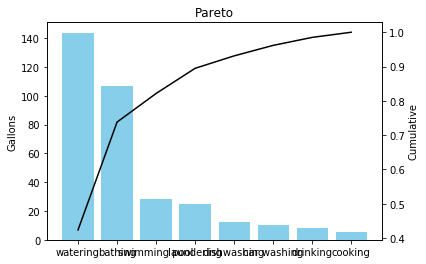

In [278]:
#Plotting the results
fig, ax1 = plt.subplots()
plt.bar('reason', 'gallons', data = df, color='skyblue')
ax1.set_ylabel("Gallons")

ax2 = ax1.twinx()
ax2.yaxis.set_label_position("right")
plt.plot('reason', 'cum_perc', data = df, color='black')
ax2.set_xlabel("Value")
ax2.set_ylabel("Cumulative")

plt.title('Pareto')

plt.show()

In [98]:
#Variance control charts
#Creating a dataset
raw = [      
{'t': 1, 'sample1': 8, 'sample2': 9, 'sample3': 15, 'sample4': 4, 'sample5': 11},
{'t': 2, 'sample1': 7, 'sample2': 10, 'sample3': 7, 'sample4': 6, 'sample5': 8},
{'t': 3, 'sample1': 11, 'sample2': 12, 'sample3': 10, 'sample4': 9, 'sample5':10},
{'t': 4, 'sample1': 12, 'sample2': 8, 'sample3': 6, 'sample4': 9, 'sample5': 12},
{'t': 5, 'sample1': 11, 'sample2': 10, 'sample3': 6, 'sample4': 14, 'sample5': 11},
{'t': 6, 'sample1': 7, 'sample2': 7, 'sample3': 10, 'sample4': 4, 'sample5': 11},
{'t': 7, 'sample1': 10, 'sample2': 7, 'sample3': 4, 'sample4': 10, 'sample5': 10},
{'t': 8, 'sample1': 8, 'sample2': 11, 'sample3': 11, 'sample4': 7, 'sample5': 7},
{'t': 9, 'sample1': 8, 'sample2': 11, 'sample3': 8, 'sample4': 14, 'sample5': 12},
{'t': 10, 'sample1': 12, 'sample2': 9, 'sample3': 12, 'sample4': 17, 'sample5': 11},
{'t': 11, 'sample1': 7, 'sample2': 7, 'sample3': 9, 'sample4': 17, 'sample5': 13},
{'t': 12, 'sample1': 9, 'sample2': 9, 'sample3': 4, 'sample4': 4, 'sample5': 11},
{'t': 13, 'sample1': 10, 'sample2': 12, 'sample3': 12, 'sample4': 12, 'sample5': 12},
{'t': 14, 'sample1': 8, 'sample2': 11, 'sample3': 9, 'sample4': 6, 'sample5': 8},
{'t': 15, 'sample1': 10, 'sample2': 13, 'sample3': 9, 'sample4': 4, 'sample5': 9},
{'t': 16, 'sample1': 9, 'sample2': 11, 'sample3': 8, 'sample4': 5, 'sample5': 11}
                                                   ]

df = pd.DataFrame(raw)
df_dropped = df.drop(['t'], axis = 1)

In [ ]:
def control_chart():
    """The function calculates"""
    ucl =

In [115]:
mean = df_dropped.mean(axis = 1).mean()

In [131]:
mean + 3 * (np.std(np.std(df_dropped)) / (5**0.5))

10.893885605136926

In [185]:
#Attribute control charts. p-charts or proportion defective
#Creating a dataset
raw = [      
{'defects': 1},
{'defects': 0},
{'defects': 9},
{'defects': 9},
{'defects': 4},
{'defects': 4},
{'defects': 5},
{'defects': 3},
{'defects': 9},
{'defects': 3},
{'defects': 10},
{'defects': 2},
{'defects': 2},
{'defects': 4},
{'defects': 9},
{'defects': 4},
{'defects': 6},
{'defects': 9},
{'defects': 2},
{'defects': 4},
{'defects': 7},
{'defects': 9},
{'defects': 0},
{'defects': 8},
{'defects': 6},
{'defects': 9},
{'defects': 6},
{'defects': 1},
{'defects': 4},
{'defects': 5},
{'defects': 2},
{'defects': 5},
{'defects': 0},
{'defects': 0},
{'defects': 4},
{'defects': 7},   
{'defects': 5},
{'defects': 1},
{'defects': 9},
{'defects': 9}    
                                         ]

df = pd.DataFrame(raw)
number_sampled = 50
df.insert(1, 'number_sampled', number_sampled)
df.head()

,defects,number_sampled
0,1,50
1,0,50
2,9,50
3,9,50
4,4,50


In [186]:
def mean_proportion_defective(defects, total):
    """The function calculates mean proportion defective for p-chart"""
    global p
    p = defects.sum() / float(total.sum())
    return p
mean_proportion_defective(df['defects'], df['number_sampled'])

def control_limitas(n, data):
    """The function calculates control limits for proportions"""
    s = ((p * (1 - p)) / n) **0.5
    ucl = p + 3 * s    
    if (p - 3 * s) < 0: 
        lcl = 0
    else: 
        lcl = (p - 3 * s)
    return data.insert(data.shape[1], 'lcl', lcl),    data.insert(data.shape[1], 'ucl', ucl)
control_limitas(50, df)

df['p'] = df.defects.divide(50)

df.head()

,defects,number_sampled,lcl,ucl,p
0,1,50,0,0.22414,0.02
1,0,50,0,0.22414,0.00
2,9,50,0,0.22414,0.18
3,9,50,0,0.22414,0.18
4,4,50,0,0.22414,0.08


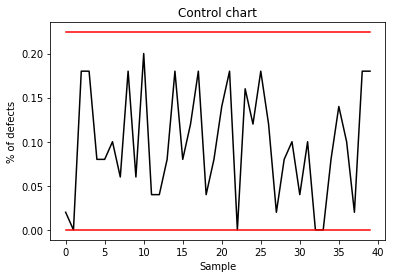

In [187]:
#Plotting the results
plt.plot('p', data = df, color='black')
plt.plot('lcl', data = df, color='red')
plt.plot('ucl', data = df, color='red')
plt.title('Control chart')
plt.xlabel('Sample')
plt.ylabel('% of defects')
plt.show()

In [213]:
#C-chart
#Creating a dataset
raw = [      
{'defects': 5},
{'defects': 6},
{'defects': 3},
{'defects': 0},
{'defects': 4},    
{'defects': 5},
{'defects': 1},
{'defects': 2},
{'defects': 7},
{'defects': 4},     
 ]

df = pd.DataFrame(raw)
df.head()

,defects
0,5
1,6
2,3
3,0
4,4


In [214]:
def control_limits_number_of_units(defects, data):
    """The function calculates control limits for the number of defects per unit calculation"""
    mean = defects.sum() / len(data)
    st_dev = mean ** 0.5
    ucl = mean + 3 * st_dev
    if (mean - 3 * st_dev) < 0: 
        lcl = 0
    else: 
        lcl = (mean - 3 * st_dev)
    return data.insert(data.shape[1], 'lcl', lcl), data.insert(data.shape[1], 'ucl', ucl)
control_limits_number_of_units(df.iloc[:,0], df)

df.head()

,defects,lcl,ucl
0,5,0,8.196152
1,6,0,8.196152
2,3,0,8.196152
3,0,0,8.196152
4,4,0,8.196152


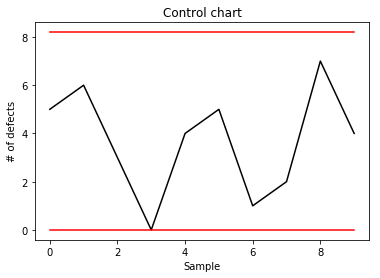

In [217]:
#Plotting the results
plt.plot('defects', data = df, color='black')
plt.plot('lcl', data = df, color='red')
plt.plot('ucl', data = df, color='red')
plt.title('Control chart')
plt.xlabel('Sample')
plt.ylabel('# of defects')
plt.show()

In [260]:
#C-chart
#Creating a dataset
raw = [      
{'defects': 3},
{'defects': 2},
{'defects': 1},
{'defects': 3},
{'defects': 2},    
{'defects': 2},
{'defects': 8},
{'defects': 2},
{'defects': 0},
{'defects': 3},    
{'defects': 5},
{'defects': 2},
{'defects': 0} ,
{'defects': 4}     
 ]

df = pd.DataFrame(raw)

In [261]:
def control_limits_number_of_units(defects, data):
    """The function calculates control limits for the number of defects per unit calculation"""
    mean = defects.sum()/float(len(data))
    st_dev = mean ** 0.5
    ucl = mean + 3 * st_dev
    if (mean - 3 * st_dev) < 0: 
        lcl = 0
    else: 
        lcl = (mean - 3 * st_dev)
    return mean, st_dev, data.insert(data.shape[1], 'lcl', lcl), data.insert(data.shape[1], 'ucl', ucl)
control_limits_number_of_units(df.iloc[:,0], df)

(2.642857142857143, 1.625686668105863, None, None)

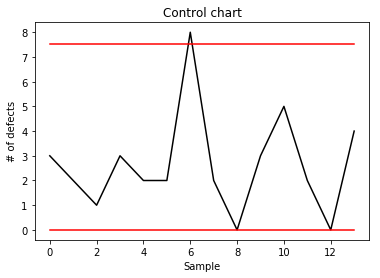

In [262]:
#Plotting the results
plt.plot('defects', data = df, color='black')
plt.plot('lcl', data = df, color='red')
plt.plot('ucl', data = df, color='red')
plt.title('Control chart')
plt.xlabel('Sample')
plt.ylabel('# of defects')
plt.show()

In [263]:
df.head()

,defects,lcl,ucl
0,3,0,7.519917
1,2,0,7.519917
2,1,0,7.519917
3,3,0,7.519917
4,2,0,7.519917


In [280]:
#Paretto chart
#Creating a dataset
raw = [      
{'reason': 'wing', 'num': 80},
{'reason': 'shortage', 'num': 60},
{'reason': 'plug', 'num': 50}, 
{'reason': 'other', 'num': 10}    
               ]

df = pd.DataFrame(raw).sort_values(by = 'num', ascending = False)
t = df.num.sum()

#Calculating % & cum percentage
df['percentage'] = df.num.divide(t)
df['cum_perc'] = df.percentage.cumsum(); df

,num,reason,percentage,cum_perc
0,80,wing,0.40,0.40
1,60,shortage,0.30,0.70
2,50,plug,0.25,0.95
3,10,other,0.05,1.00


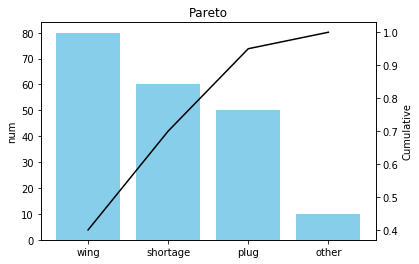

In [281]:
#Plotting the results
fig, ax1 = plt.subplots()
plt.bar('reason', 'num', data = df, color='skyblue')
ax1.set_ylabel("num")

ax2 = ax1.twinx()
ax2.yaxis.set_label_position("right")
plt.plot('reason', 'cum_perc', data = df, color='black')
ax2.set_xlabel("Value")
ax2.set_ylabel("Cumulative")

plt.title('Pareto')

plt.show()